Các cụm nhiễu (có 1 điểm): [1, 2]


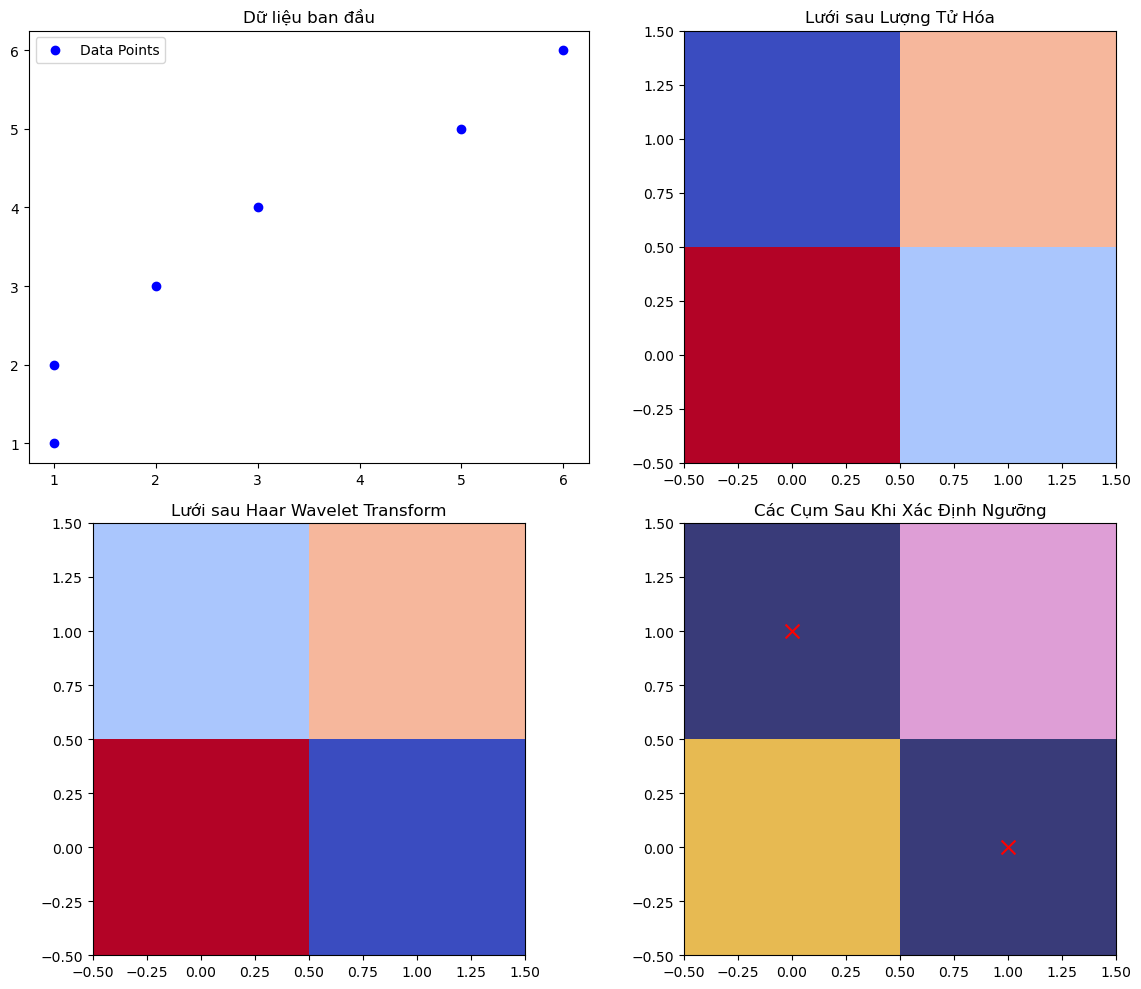

Lưới sau lượng tử hóa:
 [[3 1]
 [0 2]]
Lưới sau Haar Wavelet Transform:
 [[1.5 0. ]
 [0.5 1. ]]
Lưới sau xác định ngưỡng:
 [[1.5 0. ]
 [0.  1. ]]
Các cụm được xác định:
 [[1 0]
 [0 2]]
Số cụm: 2
Cụm nhiễu (được đánh dấu màu đỏ):
 [[False  True]
 [ True False]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Dữ liệu đầu vào
data_points = np.array([
    [1, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [5, 5],
    [6, 6]
])

# Bước 1: Lượng tử hóa dữ liệu
def quantize_data(data, s):
    x_min, y_min = data.min(axis=0)
    x_max, y_max = data.max(axis=0)
    x_range, y_range = x_max - x_min, y_max - y_min

    x_step = x_range / s
    y_step = y_range / s

    grid = np.zeros((s, s), dtype=int)
    for x, y in data:
        grid_x = min(int((x - x_min) // x_step), s - 1)
        grid_y = min(int((y - y_min) // y_step), s - 1)
        grid[grid_x, grid_y] += 1
    return grid

# Bước 2: Biến đổi Haar Wavelet
def haar_wavelet_transform(grid):
    def transform_row(row):
        mid = len(row) // 2
        l = (row[:mid * 2:2] + row[1:mid * 2:2]) / 2
        h = (row[:mid * 2:2] - row[1:mid * 2:2]) / 2
        return np.concatenate([l, h])

    # Biến đổi theo hàng
    transformed = np.apply_along_axis(transform_row, axis=1, arr=grid)

    # Biến đổi theo cột
    transformed = np.apply_along_axis(transform_row, axis=0, arr=transformed)

    return transformed

# Bước 3: Xác định ngưỡng
def threshold_grid(grid, threshold):
    return np.where(grid >= threshold, grid, 0)

# Bước 4: Phân cụm dựa trên tính liên thông
def cluster(grid):
    clusters, num_clusters = label(grid)
    return clusters, num_clusters

# Thực hiện thuật toán
s = 2  # Chia lưới 2x2
quantized_grid = quantize_data(data_points, s)
wavelet_grid = haar_wavelet_transform(quantized_grid)
threshold = 1  # Ngưỡng
thresholded_grid = threshold_grid(wavelet_grid, threshold)
clusters, num_clusters = cluster(thresholded_grid)

# Xác định cụm nhiễu (cụm có giá trị nhỏ và không đủ mạnh)
noise_clusters = (clusters == 0)  # Cụm nhiễu thường có giá trị 0 sau khi phân cụm

# Tìm các cụm nhiễu (các cụm có kích thước nhỏ hoặc chỉ có 1 điểm)
cluster_sizes = np.bincount(clusters.flatten())
noise_cluster_ids = [i for i, size in enumerate(cluster_sizes) if size == 1]  # Các cụm có 1 điểm

# In các cụm nhiễu
print("Các cụm nhiễu (có 1 điểm):", noise_cluster_ids)

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Biểu đồ 1: Dữ liệu ban đầu
axes[0, 0].scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')
axes[0, 0].set_title('Dữ liệu ban đầu')
axes[0, 0].legend()

# Biểu đồ 2: Lưới sau lượng tử hóa
axes[0, 1].imshow(quantized_grid, cmap='coolwarm', origin='lower')
axes[0, 1].set_title('Lưới sau Lượng Tử Hóa')

# Biểu đồ 3: Lưới sau Haar Wavelet Transform
axes[1, 0].imshow(wavelet_grid, cmap='coolwarm', origin='lower')
axes[1, 0].set_title('Lưới sau Haar Wavelet Transform')

# Biểu đồ 4: Các cụm sau khi xác định ngưỡng với phân cụm
axes[1, 1].imshow(clusters, cmap='tab20b', origin='lower')  # Sử dụng 'tab20b' cho màu sắc khác nhau cho các cụm
axes[1, 1].set_title('Các Cụm Sau Khi Xác Định Ngưỡng')

# Vẽ các điểm nhiễu
axes[1, 1].scatter(*np.where(noise_clusters), color='red', label='Cụm Nhiễu', s=100, marker='x')

plt.tight_layout()
plt.show()

# In kết quả
print("Lưới sau lượng tử hóa:\n", quantized_grid)
print("Lưới sau Haar Wavelet Transform:\n", wavelet_grid)
print("Lưới sau xác định ngưỡng:\n", thresholded_grid)
print("Các cụm được xác định:\n", clusters)
print("Số cụm:", num_clusters)
print("Cụm nhiễu (được đánh dấu màu đỏ):\n", noise_clusters)
